In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [8]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        return np.array([xp, yp, p2, p3, zeros, zeros, -p0, -p1])
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3],yb[0]-1,yb[1]-1,yb[2],yb[3]])

    #set the intial conditions and yo
    t_steps = 200
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    
    y0 = np.ones((8,t_steps))
    # p0 = np.array([1,1])
    # Solve the system.
    
    sol = solve_bvp(ode, bc, t, y0)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Problem 1')
    plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

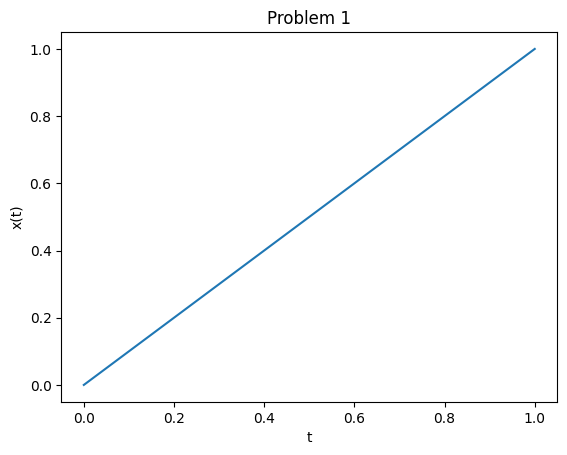

In [9]:
prob1()

In [6]:
def obstacle(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1]) + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [7]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 10
    r = (.1,.1)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = obstacle_dx(x,y,W,r)
        new_p1 =  obstacle_dy(x,y,W,r)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-3,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z = obstacle(X,Y,W,r) #find Z 
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 2')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

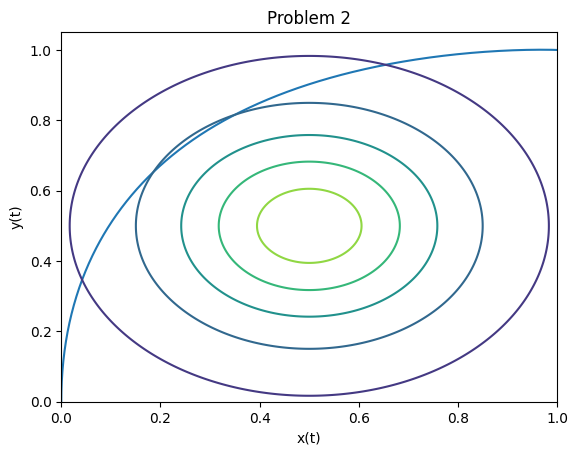

In [8]:
prob2()

In [71]:
def prob3():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 1000
    r = (.005,.005)
    c1 = (.2,.2)
    c2 = (.6,.8)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2)
        new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z1 = obstacle(X,Y,W,r,c1) #find Z 
    Z2 = obstacle(X,Y,W,r,c2) #find Z 
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z1)
    plt.contour(X,Y,Z2)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 3')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

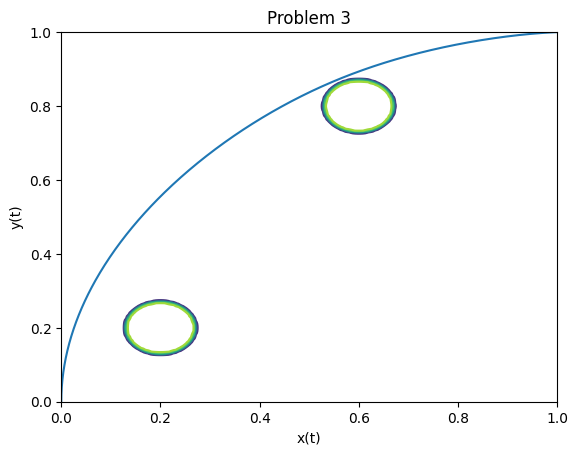

In [72]:
prob3()

In [77]:
def prob4():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 1000
    r = (.005,.005)
    c1 = (.2,.2)
    c2 = (.6,.8)
    c3 = (.3,.6)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3)
        new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z1 = obstacle(X,Y,W,r,c1) #find Z 
    Z2 = obstacle(X,Y,W,r,c2) #find Z 
    Z3 = obstacle(X,Y,W,r,c3)
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z1)
    plt.contour(X,Y,Z2)
    plt.contour(X,Y,Z3)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 4')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

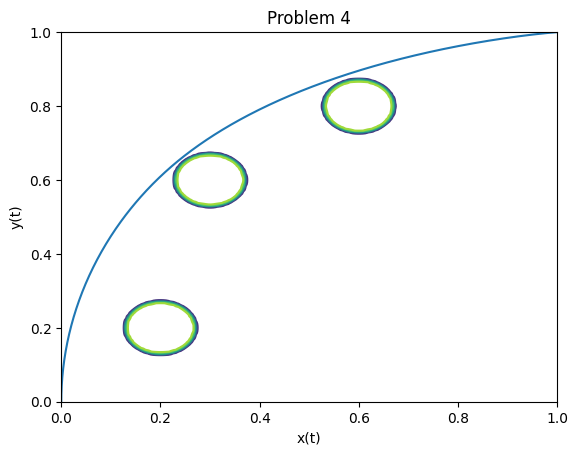

In [78]:
prob4()

In [82]:
def prob5():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 10000
    r = (.005,.005)
    c1 = (.2,.2)
    c2 = (.6,.9)
    c3 = (.3,.8)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3)
        new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z1 = obstacle(X,Y,W,r,c1) #find Z 
    Z2 = obstacle(X,Y,W,r,c2) #find Z 
    Z3 = obstacle(X,Y,W,r,c3)
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z1)
    plt.contour(X,Y,Z2)
    plt.contour(X,Y,Z3)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 5')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

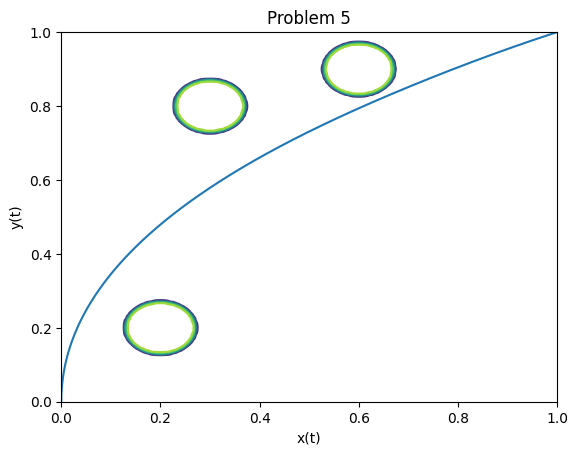

In [83]:
prob5()

In [86]:
def prob6():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 100000
    r = (.005,.005)
    c1 = (.2,.2)
    c2 = (.6,.9)
    c3 = (.3,.8)
    c4 = (.5,.7)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c4)
        new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c4)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z1 = obstacle(X,Y,W,r,c1) #find Z 
    Z2 = obstacle(X,Y,W,r,c2) #find Z 
    Z3 = obstacle(X,Y,W,r,c3)
    Z4 = obstacle(X,Y,W,r,c4)
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z1)
    plt.contour(X,Y,Z2)
    plt.contour(X,Y,Z3)
    plt.contour(X,Y,Z4)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 6')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

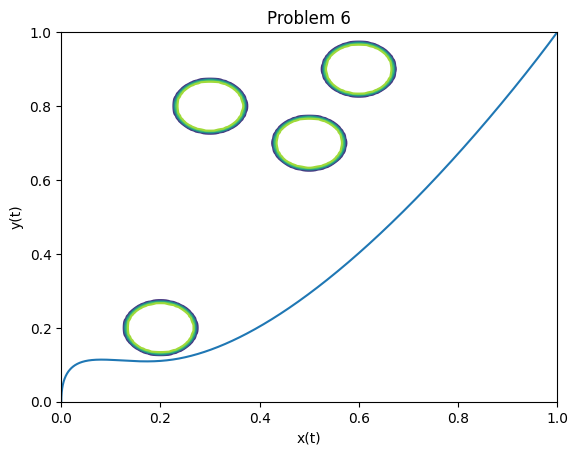

In [87]:
prob6()

In [89]:
def new_obstacle(x,y,t,xspeed,yspeed,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def new_obstacle_dx(x,y,t,xspeed,yspeed,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def new_obstacle_dy(x,y,t,xspeed,yspeed, W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''
    c = (xspeed*t+c[0],yspeed*t+c[1])
    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [93]:
def prob7():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    t0 = 0
    tf = 1
    W = 10
    r = (.005,.005)

    # C = 10
    # c_x = 0.5
    # c_y = .5
    # r = 1/3


    def ode(t, y_val): #define the ode systen
        x, y, xp, yp, p0, p1, p2, p3 = y_val
        # print(np.shape(x))
        # print(np.shape(p))
        zeros = np.zeros_like(x)
        new_p0 = new_obstacle_dx(x,y,t,.0001,.0001,W,r)
        new_p1 =  new_obstacle_dy(x,y,t,.0001,.0001,W,r)
        return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])
    
    def bc(ya,yb):
    # ya are the initial values
    # yb are the final values
        return np.array([ya[0],ya[1],ya[2],ya[3]-3,yb[0]-1,yb[1]-1,yb[2],yb[3]])

    
    t_steps = 200 #set the time steps and linsapces
    t = np.linspace(t0,tf,t_steps)
    x = np.linspace(0,1,t_steps)
    y = np.linspace(0,1,t_steps)
    X,Y = np.meshgrid(x,y)
    Z = obstacle(X,Y,W,r) #find Z 
    # element 4: the initial guess.
    y0 = np.ones((8,t_steps))*3
    # Solve the system.
    sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    #plot the solutions and label everything
    plt.plot(sol.y[0], sol.y[1])
    plt.contour(X,Y,Z)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('Problem 7')
    plt.show()
    #set the intial conditions and yo
    # t_steps = 200
    # # t = np.linspace(t0,tf,t_steps)
    # # x = np.linspace(0,1,t_steps)
    
    # y0 = np.ones((8,t_steps))
    # # p0 = np.array([1,1])
    # # Solve the system.
    
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
    # t_steps = 200 #set the time steps and linsapces
    # t = np.linspace(t0,tf,t_steps)
    # x = np.linspace(t0,1,t_steps)
    # y = np.linspace(t0,1,t_steps)
    # X,Y = np.meshgrid(x,y)
    # Z = obstacle(X,Y,W,r) #find Z 
    # # element 4: the initial guess.
    # y0 = np.ones((8,t_steps))*3
    # # Solve the system.
    # sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

    # #plot the solutions and label everything
    # plt.plot(sol.y[0], sol.y[1])
    # plt.contour(X,Y,Z)
    # plt.xlabel('x(t)')
    # plt.ylabel('y(t)')
    # plt.title('Problem 2')
    # plt.show()

    # plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
    # plt.xlabel('t')
    # plt.ylabel('u(t)')
    # plt.title('Problem 1')
    # plt.show()

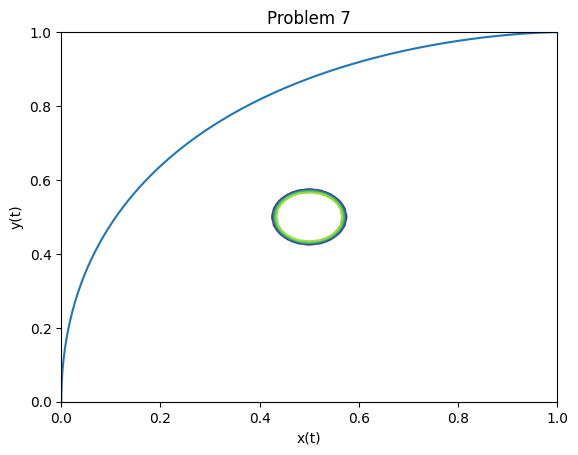

In [94]:
prob7()